In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, cheby1

import librosa


y, fs = librosa.load("inputs/chitara_inreg2.wav", sr=None)

y = librosa.to_mono(y)

print(f"Sound clip is {len(y)/fs} seconds long")




# f0 = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
# print(f0)

Sound clip is 11.5 seconds long


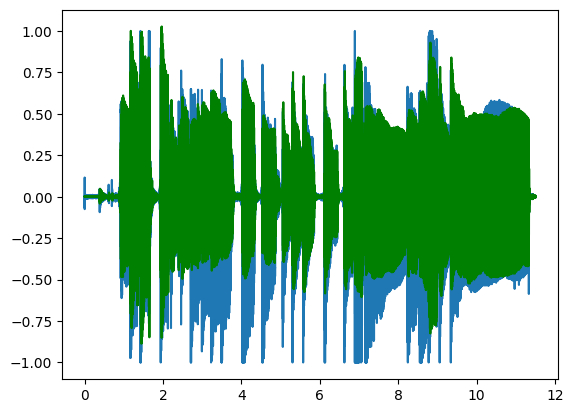

In [8]:

order = 4
low = 90.0
high= 900.0
# b,a = butter(order, [low, high], fs=fs, btype='band')
b, a = cheby1(order, 1, [low, high], fs=fs, btype='band')



# fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
# sound_fft = np.fft.rfft(y)  

# sound_fft_abs = np.abs(sound_fft)

# low = 60.0

# is_higher = sound_fft_abs > low

# freq_higher_than_low =  is_higher * sound_fft


# signal_without_noise = np.fft.irfft(freq_higher_than_low)



# maxim = np.max(y)
# y = y/maxim
# print(maxim)




time_disc = np.linspace(0, len(y)/ fs, num=len(y))
plt.plot(time_disc,y)

filtered_sound = lfilter(b, a ,y)
y = filtered_sound

onset_frames = librosa.onset.onset_detect(y=y)
onset_samples = librosa.frames_to_samples(onset_frames)

plt.plot(time_disc, filtered_sound, color="green")




# for sample in onset_samples:
    # plt.axvline(x=sample/fs, color="red")

# for sample in onset_samples:
#     plt.axvline(x = sample/fs, color= 'red')

# for i in range(len(onset_samples)-5):
#     plt.figure(figsize=(10,6))
#     start = onset_samples[i]
#     end = onset_samples[i+1]
#     plt.plot(time_disc[start:end+1], y[start:end+1])
#     plt.axvline(x = start/fs, color= 'red')
#     plt.axvline(x = end/fs, color= 'red')

plt.show()


G-1
G♯-1
A-1
B-1
C0
C♯0
D0
D♯0
D♯0
E0
F0
F♯0
G0
G0
G♯0
A0
A0
A♯0
B0
B0
C1
C1
C♯1
C♯1
D1
D1
D♯1
D♯1
D♯1
E1
E1
F1
F1
F♯1
F♯1
F♯1
G1
G1
G1
G♯1
G♯1
G♯1
A1
A1
A1
A♯1
A♯1
A♯1
B1
B1
B1
B1
C2
C2
C2
C2
C♯2
C♯2
C♯2
C♯2
D2
D2
D2
D2
D♯2
D♯2
D♯2
D♯2
D♯2
E2
E2
E2
E2
F2
F2
F2
F2
F2
F♯2
F♯2
F♯2
F♯2
F♯2
F♯2
G2
G2
G2
G2
G2
G♯2
G♯2


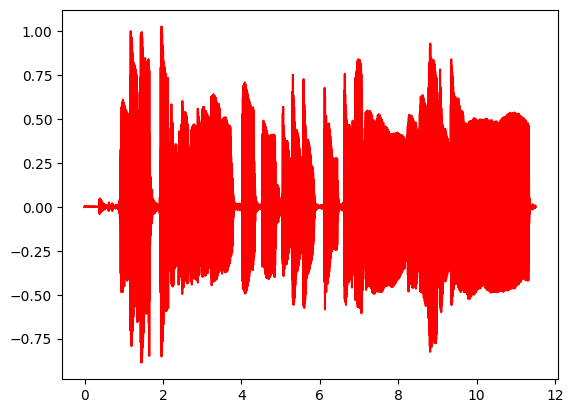

In [9]:
fft_frequencies = np.fft.rfftfreq(len(y), 1/fs)
sound_fft = np.fft.rfft(y)  

freq = round(fft_frequencies[58], 2)
maxim = np.max((np.abs(sound_fft)))

# maxim = np.max(np.abs(sound_fft))
# thresholding 

window_size = 5000

notes = ['C', 'C♯', 'D', 'D♯', 'E', 'F', 'F♯', 'G', 'G♯', 'A', 'A♯', 'B']
bucket_indices = []


fft_frequencies = np.fft.rfftfreq(window_size, 1/fs)


for j in range(len(fft_frequencies)): 
    if fft_frequencies[j] > 100 and fft_frequencies[j] < 900:
        if librosa.hz_to_note(fft_frequencies[j], octave=False) in notes:
            print(librosa.hz_to_note(j))


plt.plot(time_disc, filtered_sound, color="red")
# plt.figure(figsize=(8,5))
# plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1300), fft_frequencies, None) , np.abs(sound_fft))
# plt.plot(fft_frequencies , np.abs(sound_fft))



# plt.figure(figsize=(8,6))
# plt.plot(np.where((fft_frequencies > 100) & (fft_frequencies < 1000), fft_frequencies, None) , np.abs(sound_fft)/maxim)




In [11]:

# envelope  


def find_fundamental_frequency(fft, fft_frequencies):
    thrershold = 0.035
    notes = []
    for j in range(len(fft)):
        amplitude = np.abs(fft[j])/maxim
        freq = round(fft_frequencies[j], 2)
        if amplitude < thrershold:
            continue
        notes.append([freq, round(amplitude,2)])

    if notes == []:
        return None
    for n in notes:
        print(librosa.hz_to_note(n[0]), n[1], end=" || ")
    print()
    return min(notes, key = lambda x: x[0])
notes = []

overtones = []

for i in range(0, len(onset_samples) -1):
    window = y[onset_samples[i]: onset_samples[i+1]]
    if len(window)/fs < 0.05:
        continue
    fft_frequencies = np.fft.rfftfreq(len(window), 1/fs)
    fft = np.fft.rfft(window)
    notes_from_sequence = find_fundamental_frequency(fft, fft_frequencies)
    # if notes_from_sequence != None:
        # print(i)
        # print(librosa.hz_to_note(notes_from_sequence[0]))

final_window = y[onset_samples[-1]:]
fft_frequencies = np.fft.rfftfreq(len(final_window), 1/fs)
fft = np.fft.rfft(final_window)
notes_from_sequence = find_fundamental_frequency(fft, fft_frequencies)
if notes_from_sequence != None:
    print(i)


print(notes)    


E3 0.06 || 
E3 0.08 || B3 0.04 || 
E3 0.08 || B3 0.04 || 
E3 0.06 || E3 0.04 || 
G♯2 0.04 || 
C♯3 0.05 || C♯4 0.04 || 
C♯3 0.05 || C♯3 0.06 || C♯4 0.04 || 
C♯3 0.05 || C♯3 0.05 || C♯4 0.04 || C♯4 0.04 || 
C♯3 0.04 || C♯3 0.09 || C♯3 0.06 || C♯4 0.06 || C♯4 0.05 || 
B2 0.04 || B2 0.06 || B3 0.05 || B3 0.06 || 
F♯3 0.05 || 
F♯3 0.04 || F♯3 0.04 || 
F♯2 0.04 || F♯3 0.05 || 
F♯3 0.04 || 
C♯3 0.06 || C♯4 0.05 || 
B2 0.25 || B2 0.08 || B2 0.05 || B3 0.1 || B3 0.15 || B3 0.08 || F♯4 0.07 || 
B2 0.06 || B3 0.05 || B3 0.05 || 
B2 0.05 || B3 0.05 || 
G♯2 0.05 || G♯2 0.05 || G♯3 0.08 || 
F♯3 0.05 || 
E2 0.04 || E3 0.04 || E3 0.05 || E3 0.06 || E3 0.07 || E3 0.09 || E3 0.47 || E3 0.4 || E3 0.17 || E3 0.11 || E3 0.07 || E3 0.05 || B3 0.04 || B3 0.13 || B3 0.07 || B3 0.04 || G♯4 0.04 || 
E3 0.08 || 
[]
